In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut, KFold, train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR

import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\Jared\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
path = ""

# All Depth Converted Data
Alpha = pd.read_csv(path+"AlphaDepthConvertedData.csv")
Bravo = pd.read_csv(path+"BravoDepthConvertedData.csv")
Charlie = pd.read_csv(path+"CharlieDepthConvertedData.csv")
Delta = pd.read_csv(path+"DeltaDepthConvertedData.csv")
Foxtrot = pd.read_csv(path+"FoxtrotDepthConvertedData.csv")

Alpha.name = 'Alpha'
Bravo.name = 'Bravo'
Charlie.name = 'Charlie'
Delta.name = 'Delta'
Foxtrot.name = 'Foxtrot'

dfs = [Alpha, Bravo, Charlie, Delta, Foxtrot]
loo = LeaveOneOut()

# Exploratory Data Analysis

In [3]:
Alpha.head()

,_id,Unnamed: 1,Date,Time,Time Step,Time Zone,RT 01S DATE TIME,RT 01S BIT DEPTH,RT 01S HOLE DEPTH,RT 01S BIT DEPTH CLEANSED VALUE,...,SLIDE DRILLING,ROTARY DRILLING,BIT AGRESSIVENESS,SSA,MR BHA NUMBER,MR BHA LENGTH,MR BIT SIZE,WP DEPTH,WP INCLINATION,WP AZIMUTH
"ObjectId(""5aafef6fc70fc541732a0ac7"")",0,2017-01-19,19:33:20,345560,tzoffset(None,-25200),2017-01-19T19:33:20-07:00,97.74,97.74,97.74,...,1,0,0.320598,0.0,1,964.47,9.88,100.0,0.25,270.0
"ObjectId(""5aafef6fc70fc541732a0ac8"")",1,2017-01-19,19:33:30,345570,tzoffset(None,-25200),2017-01-19T19:33:30-07:00,98.42,98.42,98.42,...,1,0,1.288802,0.0,1,964.47,9.88,100.0,0.25,270.0
"ObjectId(""5aafef6fc70fc541732a0ac9"")",2,2017-01-19,19:33:40,345580,tzoffset(None,-25200),2017-01-19T19:33:40-07:00,98.78,98.78,98.81,...,1,0,1.932218,0.0,1,964.47,9.88,100.0,0.25,270.0
"ObjectId(""5aafef6fc70fc541732a0aca"")",3,2017-01-19,19:33:50,345590,tzoffset(None,-25200),2017-01-19T19:33:50-07:00,99.14,99.14,99.14,...,1,0,0.528110,0.0,1,964.47,9.88,100.0,0.25,270.0
"ObjectId(""5aafef6fc70fc541732a0acb"")",4,2017-01-19,19:34:00,345600,tzoffset(None,-25200),2017-01-19T19:34-07:00,99.49,99.49,99.50,...,1,0,1.953917,0.0,1,964.47,9.88,100.0,0.25,270.0


In [4]:
feature_cols = ["Time", 
                "RT 01S VC WEIGHT ON BIT CLEANSED VALUE", 
                "RT 01S SURFACE TORQUE CLEANSED VALUE",
                "RT 01S SURFACE RPM CLEANSED VALUE", 
                "RT 01S FLOW RATE OUT CLEANSED VALUE"]

label = 'RT 01S VC ON BOTTOM ROP'

In [5]:
mean_samples = 0
mean_ROP = 0
for df in dfs:
    mean_samples += len(df)
    mean_ROP += np.mean(df[label])
    
mean_samples /= len(dfs)
mean_ROP /= len(dfs)

print('Mean Samples {}, Mean ROP {}'.format(mean_samples, mean_ROP))

Mean Samples 57330.4, Mean ROP 85.79490173937734


# Random Forests

In [6]:
RMSE = np.array([])
RFs = np.array([])

for train_idx, test_idx in loo.split(dfs):  # train on 4 wells and test on the 5th
    print("TRAIN:", train_idx, "TEST:", test_idx)

    train_set = pd.concat(dfs[i] for i in train_idx.tolist())
    test_set = dfs[test_idx.tolist()[0]]
    # The paper used WOB, RPM, and flow rate of drilling mud
    # I don't know what the deal with the cleansed values is, but they are all that's in this data set
    # If nothing else, gives us a starting point
    
    X_train = train_set[feature_cols]
    y_train = train_set[label]
    X_test =  test_set[feature_cols]
    y_test = test_set[label]
    
    rf = RandomForestRegressor(n_estimators=100, random_state=42)  # tune n_estimators with hyperparameter optimization later
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    RMSE = np.append(RMSE, rmse)
    RFs = np.append(RFs, rf)


TRAIN: [1 2 3 4] TEST: [0]
TRAIN: [0 2 3 4] TEST: [1]
TRAIN: [0 1 3 4] TEST: [2]
TRAIN: [0 1 2 4] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]


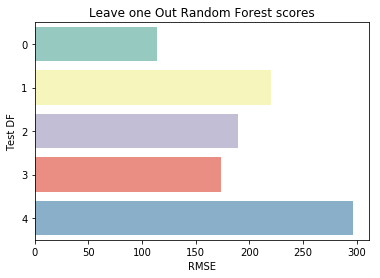

In [7]:
df1 = pd.DataFrame({"RMSE":RMSE, \
                       "Test DF":['0','1',
                                  '2','3','4'
                                   ]})

g = sns.barplot("RMSE","Test DF",data = df1, palette="Set3",
                orient = "h")
g.set_xlabel("RMSE")
g = g.set_title("Leave one Out Random Forest scores")

# Vector Auto Regression

In [8]:
X = Alpha[feature_cols + [label]]
split = int(len(X) / 2)
X1, X2 = X.iloc[0:split], X.iloc[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean half one=\n{},\nmean half two=\n{}\n'.format(mean1, mean2))
print('variance half one =\n{},\nvariance half two =\n{}\n'.format(var1, var2))

mean half one=
Time                                      784544.477018
RT 01S VC WEIGHT ON BIT CLEANSED VALUE        23.166146
RT 01S SURFACE TORQUE CLEANSED VALUE        5806.451419
RT 01S SURFACE RPM CLEANSED VALUE             19.978342
RT 01S FLOW RATE OUT CLEANSED VALUE           42.619614
RT 01S VC ON BOTTOM ROP                       93.938195
dtype: float64,
mean half two=
Time                                      1.704776e+06
RT 01S VC WEIGHT ON BIT CLEANSED VALUE    3.164438e+01
RT 01S SURFACE TORQUE CLEANSED VALUE      6.104779e+03
RT 01S SURFACE RPM CLEANSED VALUE         3.255849e+01
RT 01S FLOW RATE OUT CLEANSED VALUE       1.825959e+01
RT 01S VC ON BOTTOM ROP                   6.996599e+01
dtype: float64

variance half one =
Time                                      2.931567e+10
RT 01S VC WEIGHT ON BIT CLEANSED VALUE    1.571414e+02
RT 01S SURFACE TORQUE CLEANSED VALUE      2.118414e+07
RT 01S SURFACE RPM CLEANSED VALUE         3.930562e+02
RT 01S FLOW RATE OUT CLEANSED VA

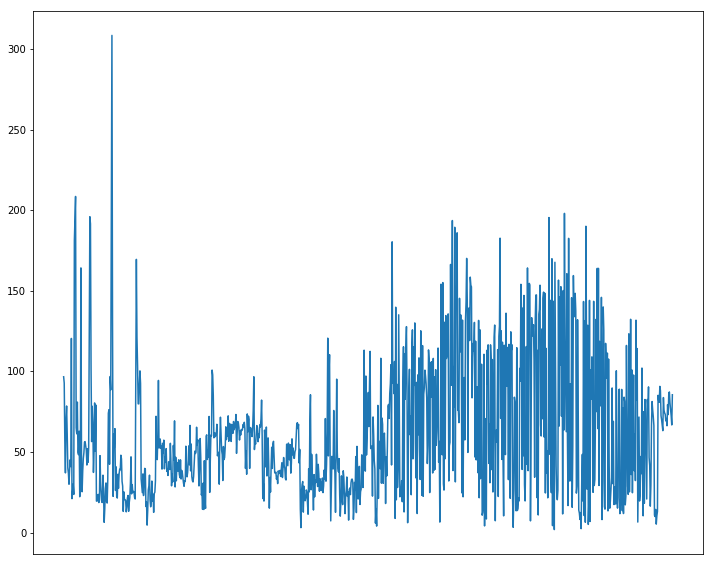

In [9]:
plt.figure(figsize=(12,10))
plt.plot(Alpha['RT 01S DATE TIME'].iloc[10000::50][:-1].values, Alpha[label].iloc[10000::50][:-1].values)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

## The time-series data does not seem to be completely stationary, which will affect the model performance. 

In [10]:
#temp = Alpha.drop(columns=['_id', 'Unnamed: 1','Date','Time Step','Time Zone','RT 01S DATE TIME'])
temp = Alpha[feature_cols + [label]]
size = int(len(temp) * 0.66)
train, test = temp.iloc[0:size], temp.iloc[size:]
# train autoregression
model = VAR(train)
model_fit = model.fit(trend = 'c')
window = model_fit.k_ar
coef = model_fit.params

C:\Users\Jared\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [11]:
# walk forward over time steps in test
history = [train.iloc[i] for i in range(len(train))]
predictions = list()

In [12]:
def predict(coef, history):
    yhat = coef.iloc[0]
    for i in range(1, len(coef)):
        yhat += coef.iloc[i] * history[-i]
    return yhat

In [13]:
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test.iloc[t]
    predictions.append(yhat)
    history.append(obs)
    
label_predictions = [x[label] for x in predictions]

In [49]:
error = mean_squared_error(test[label], label_predictions)
print('Test MSE: %.3f' % error)
residuals = test[label] - label_predictions

Test MSE: 11655.163


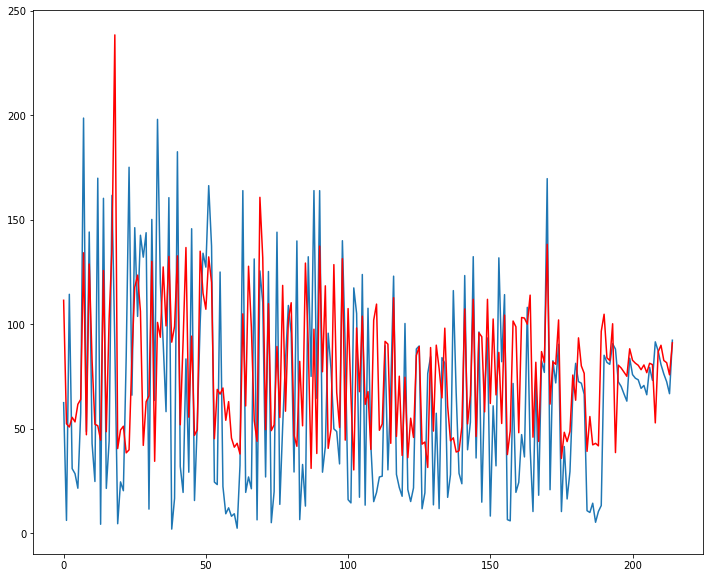

In [50]:
#time vs (actual and predicted)
plt.figure(figsize=(12,10))
plt.plot(test[label].iloc[10000::50][:-1].values)
plt.plot(label_predictions[10000::50][:-1], color='red')
plt.show()

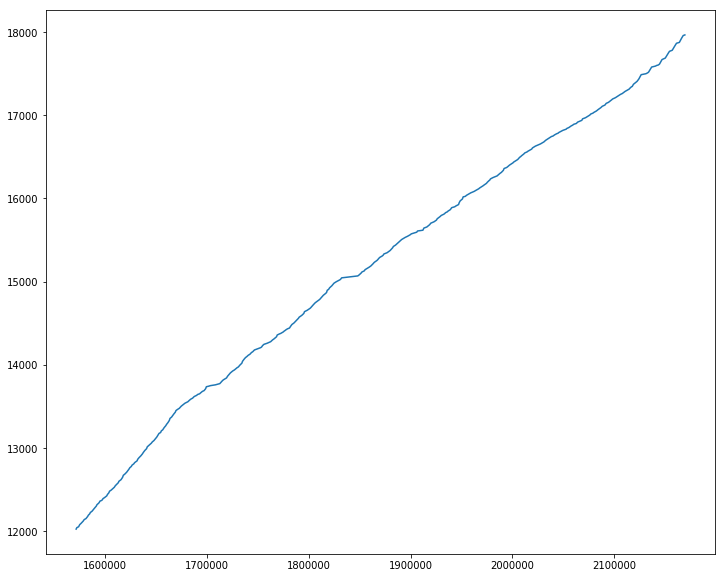

In [34]:
#time vs depth
plt.figure(figsize=(12,10))
plt.plot(Alpha.iloc[size:]['Time'].iloc[::50][:-1].values, Alpha.iloc[size:]['RT 01S HOLE DEPTH'].iloc[::50][:-1].values)
plt.show()

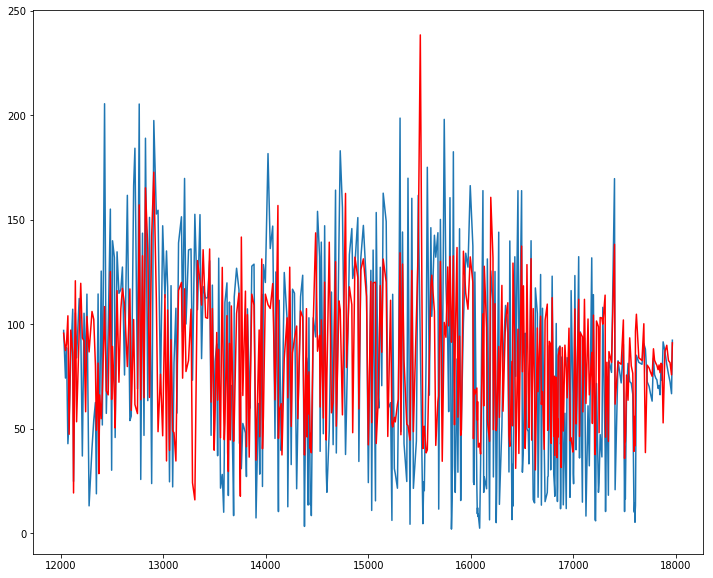

In [33]:
plt.figure(figsize=(12,10))
#depth vs actual and predicted
plt.plot(Alpha.iloc[size:]['RT 01S HOLE DEPTH'].iloc[::50][:-1].values, test[label].iloc[::50][:-1].values)
plt.plot(Alpha.iloc[size:]['RT 01S HOLE DEPTH'].iloc[::50][:-1].values, label_predictions[::50][:-1], color='red')
plt.show()

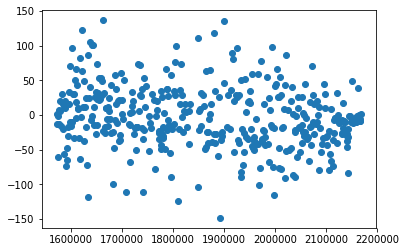

In [47]:
plt.scatter(Alpha.iloc[size:]['Time'].iloc[::50][:-1].values, residuals[::50][:-1])
plt.show()